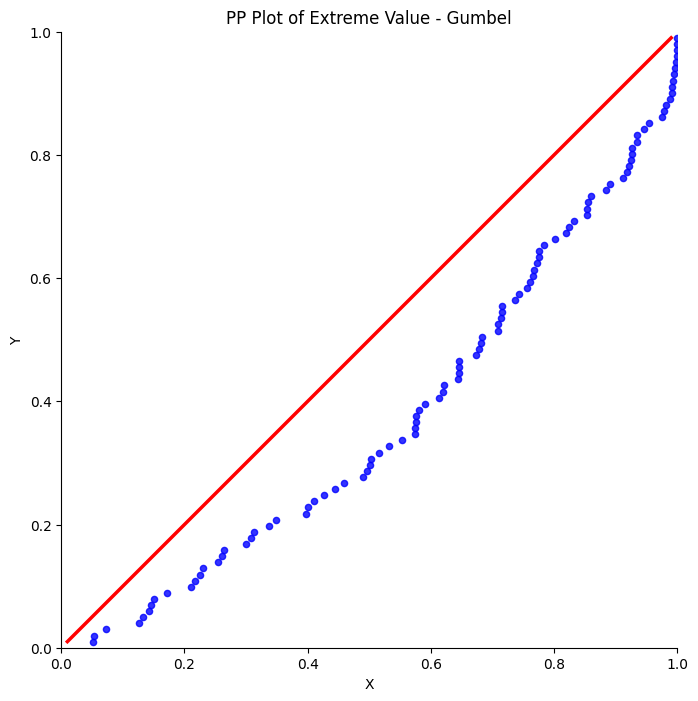

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, gumbel_r, norm
import warnings
warnings.filterwarnings('ignore')

np.random.seed(1234)

n = 100
y = np.arange(1, n + 1) / (n + 1)

# Choose EVT cdf for the plot header only
sel = "Gumbel"
# sel = "Weibull"
# sel = "Frechet"

if sel == "Weibull":
    # Weibull distribution (negative shape parameter in GEV)
    x = genextreme.rvs(c=-0.5, size=n)  # equivalent to shape=2 in R's rweibull
elif sel == "Frechet":
    # Frechet distribution (positive shape parameter in GEV)
    x = genextreme.rvs(c=0.5, size=n)   # equivalent to shape=1 in R's rfrechet
else:  # Gumbel
    # Gumbel distribution (shape parameter = 0)
    x = gumbel_r.rvs(loc=0, scale=1, size=n)

x = np.sort(x)
px = norm.cdf(x) 

fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_alpha(0.0)  
ax.patch.set_alpha(0.0)   

ax.plot(y, y, color='red', linewidth=2.5, label='Reference')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

ax.scatter(px, y, color='blue', s=20, alpha=0.8, label='Data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'PP Plot of Extreme Value - {sel}')

ax.set_xticks(np.arange(0, 1.2, 0.2))
ax.set_yticks(np.arange(0, 1.2, 0.2))

#ax.grid(True, alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()